In [ ]:
# Importing Necessary libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('headbrain.csv')
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Gender               237 non-null    int64
 1   Age Range            237 non-null    int64
 2   Head Size(cm^3)      237 non-null    int64
 3   Brain Weight(grams)  237 non-null    int64
dtypes: int64(4)
memory usage: 7.5 KB


In [ ]:
df.isnull().sum()


Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [ ]:
df.shape


(237, 4)

In [ ]:
X = df['Head Size(cm^3)'].values
Y =  df['Brain Weight(grams)'].values

In [ ]:
X.shape


(237,)

In [ ]:
Y.shape


(237,)

In [ ]:
mean_X = np.mean(X)
mean_Y = np.mean(Y)

n = len(X)

num =0
denom = 0

for i in range(n):
    num += (X[i]-mean_X)* (Y[i]-mean_Y)
    denom +=(X[i]-mean_X)**2
m = num/denom   #summation({(x-xbar)*(y-ybar)}/(x-xbar)^2)
c = mean_Y - (m*mean_X)  #(c=ybar-m*xbar)

print(m,',',c)   #slope and the y-intercept

0.26342933948939945 , 325.57342104944223


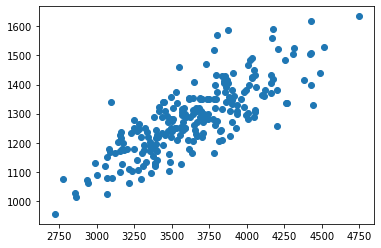

In [ ]:
plt.scatter(X,Y)  #head-size vs brain-weight


In [ ]:
#creating dummy test set
min_x = np.min(X)-100
max_x = np.max(X)+100

In [ ]:
min_x

2620

In [ ]:
max_x

4847

In [ ]:
x = np.linspace(min_x,max_x,1000)


In [ ]:
x

array([2620.        , 2622.22922923, 2624.45845846, 2626.68768769,
       2628.91691692, 2631.14614615, 2633.37537538, 2635.6046046 ,
       2637.83383383, 2640.06306306, 2642.29229229, 2644.52152152,
       2646.75075075, 2648.97997998, 2651.20920921, 2653.43843844,
       2655.66766767, 2657.8968969 , 2660.12612613, 2662.35535536,
       2664.58458458, 2666.81381381, 2669.04304304, 2671.27227227,
       2673.5015015 , 2675.73073073, 2677.95995996, 2680.18918919,
       2682.41841842, 2684.64764765, 2686.87687688, 2689.10610611,
       2691.33533534, 2693.56456456, 2695.79379379, 2698.02302302,
       2700.25225225, 2702.48148148, 2704.71071071, 2706.93993994,
       2709.16916917, 2711.3983984 , 2713.62762763, 2715.85685686,
       2718.08608609, 2720.31531532, 2722.54454454, 2724.77377377,
       2727.003003  , 2729.23223223, 2731.46146146, 2733.69069069,
       2735.91991992, 2738.14914915, 2740.37837838, 2742.60760761,
       2744.83683684, 2747.06606607, 2749.2952953 , 2751.52452

In [ ]:
y = m*x+c


Text(0, 0.5, 'Brain weight in grams')

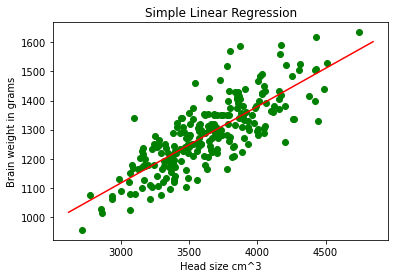

In [ ]:
plt.scatter(X,Y,color='g')
plt.plot(x,y,color='r')
plt.title('Simple Linear Regression')
plt.xlabel('Head size cm^3')
plt.ylabel('Brain weight in grams')




In [ ]:
#calculating the error
sum_pred = 0 
sum_act = 0 

for i in range(n):
  y_pred = (m*X[i]+c)
  sum_pred += (Y[i]-y_pred)**2
  sum_act +=(Y[i]-mean_Y)**2

r2 = 1-(sum_pred/sum_act)
print(r2)

0.6393117199570003


#R**2>0.5, so we have a good model

In [ ]:
def predict(x):
    y = m*x + c
    print(y)

In [ ]:
predict(4177)


1425.9177720966638


Brain weight for given head size(cm^3) is predicted.

In [ ]:
#second method 
#using scikit learn library
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = X.reshape((n,1))


In [ ]:
X.shape


(237, 1)

In [ ]:
y.shape


(1000,)

In [ ]:
lg = LinearRegression()


In [ ]:
lg.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lg.predict(X)


In [ ]:
mse = mean_squared_error(Y,y_pred)


In [ ]:
rmse = np.sqrt(mse)


In [ ]:
r2_score = lg.score(X,Y)


In [ ]:
print(rmse)
print(r2_score)

72.1206213783709
0.639311719957


In [ ]:
lg.predict([[4177]])


array([1425.9177721])

In [ ]:
lg.intercept_


325.5734210494426